In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Polygon
import matplotlib
from matplotlib import ticker, cm
from joukowski import *


In [2]:
def plot_contour(
    fig,
    ax,
    X_x,
    X_y,
    f,
    xlim=[-2, 2],
    string=r"",
    myLocator=ticker.LogLocator(),
    colorbar=False,
    fillContour=False,
    **kwargs
):
    if fillContour:
        csa = ax.contourf(X_x, X_y, f, locator=myLocator, **kwargs)
    else:
        csa = ax.contour(X_x, X_y, f, locator=myLocator, **kwargs)

    # ax.set(xlabel="$x_1$", ylabel="$x_2$")
    ax.set_title(string)
    ax.set_box_aspect(1.0)
    ax.grid(True)
    ax.set_xlim(xlim)
    ax.set_ylim(xlim)

    if colorbar:
        cax = ax.inset_axes([1.04, 0.0, 0.05, 1.0])
        fig.colorbar(csa, ax=ax, cax=cax)

    return


def plot_contour_function(
    fig,
    ax,
    func,
    numPts=100,
    xlim=[-2, 2],
    string=r"",
    myLocator=ticker.LogLocator(),
    colorbar=False,
    fillContour=False,
    **kwargs
):
    x1 = np.linspace(xlim[0], xlim[1], numPts)
    X_x, X_y = np.meshgrid(x1, x1)

    f = np.zeros(X_x.shape)

    for i in range(numPts):
        for j in range(numPts):
            f[i, j] = func([X_x[i, j], X_y[i, j]])
    if fillContour:
        csa = ax.contourf(X_x, X_y, f, locator=myLocator, **kwargs)
    else:
        csa = ax.contour(X_x, X_y, f, locator=myLocator, **kwargs)

    ax.set(xlabel="$x_1$", ylabel="$x_2$")
    ax.set_title(string)
    ax.set_box_aspect(1.0)
    ax.grid(True)
    ax.set_xlim(xlim)
    ax.set_ylim(xlim)

    if colorbar:
        cax = ax.inset_axes([1.04, 0.0, 0.05, 1.0])
        fig.colorbar(csa, ax=ax, cax=cax)

    return

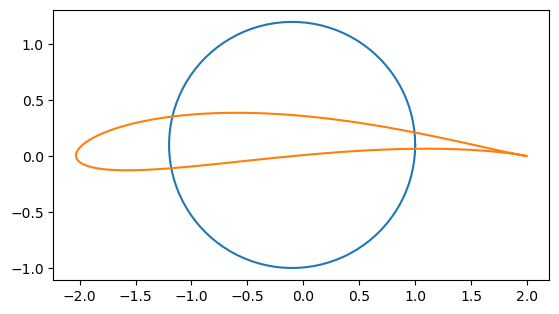

In [3]:
Foil1 = JFoil(1.1, -0.1, 0.1)
zeta = Foil1.gen_circle()
z = Foil1.toReal()

fig, ax = plt.subplots()
ax.plot(np.real(zeta), np.imag(zeta))
ax.plot(np.real(z), np.imag(z))
ax.set_aspect("equal")

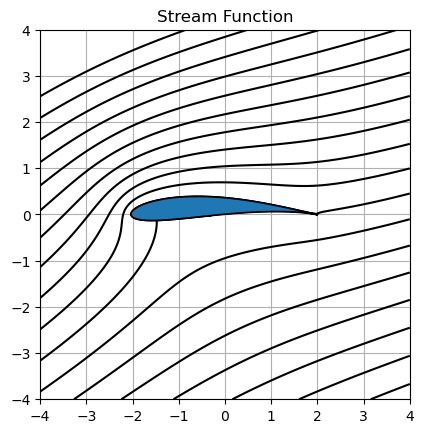

In [4]:
a = 1.1
xi0 = -0.1
eta0 = 0.1

myFoil = JFoil(a=a, xi0=xi0, eta0=eta0)
x_foil = myFoil.toReal()

fig, ax = plt.subplots()
ax.plot(np.real(x_foil), np.imag(x_foil), 'k')

xlim = [-4, 4]
numPts = 200

# Set angle of attack
aoa = 25 * np.pi / 180

# Set values of streamlines
locators = np.arange(-5, 5.1, 0.5)

x1 = np.linspace(xlim[0], xlim[1], numPts)
X_x, X_y = np.meshgrid(x1, x1)

f = np.zeros(X_x.shape)

for i in range(numPts):
    for j in range(numPts):
        f[i, j] = calcPsiFromZeta([X_x[i, j], X_y[i, j]], U=1, alpha=aoa, a=a, xi0=xi0, eta0=eta0)

plot_contour(fig, ax, X_x, X_y, f, xlim, myLocator=ticker.FixedLocator(locators),
    colorbar=False,
    fillContour=False,
    string="Stream Function", colors='black', negative_linestyles='solid')

array = np.zeros((z.__len__(), 2))

for ind, z_i in enumerate(z):
    array[ind][0] = np.real(z_i)
    array[ind][1] = np.imag(z_i)

shape = Polygon(array, alpha=1, zorder=100, edgecolor='k')

ax.add_patch(shape)
